# Limpieza de bienes raíces

Este es un conjunto de datos (dataset) reales que fue descargado usando técnicas de web scraping. La data contiene registros de **Fotocasa**, el cual es uno de los sitios más populares de bienes raíces en España. Por favor no hagas esto (web scraping) a no ser que sea para propósitos académicos.

El dataset fue descargado hace algunos años por Henry Navarro y en ningún caso se obtuvo beneficio económico de ello.

Contiene miles de datos de casas reales publicadas en la web www.fotocasa.com. Tu objetivo es extraer tanta información como sea posible con el conocimiento que tienes hasta ahora de ciencia de datos, por ejemplo ¿cuál es la casa más cara en todo el dataset?

Empecemos precisamente con esa pregunta... ¡Buena suerte!

#### Ejercicio 00. Lee el dataset assets/real_estate.csv e intenta visualizar la tabla (★☆☆)

In [2]:
import pandas as pd

# Este archivo CSV contiene puntos y comas en lugar de comas como separadores
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


#### Ejercicio 01. ¿Cuál es la casa más cara en todo el dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle del Prado, Nº20 es la más cara y su precio es de 5000000 USD`

In [3]:
ds = pd.read_csv('assets/real_estate.csv', sep=';')
house_expensive = ds.price.max()
direction_house_expensive = ds.address[ds[ds["price"]== house_expensive].index[0]]
print(house_expensive, direction_house_expensive)

8500000 El Escorial


#### Ejercicio 02. ¿Cuál es la casa más barata del dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle Alcalá, Nº58 es la más barata y su precio es de 12000 USD`

In [4]:
filter_price = ds.price[(ds.price != 0)]
house_cheap = filter_price.min()
direction_house_cheap = ds.address[ds[ds["price"] == house_cheap].index[0]]
print(house_cheap, direction_house_cheap)

600 Berlin, Coslada


#### Ejercicio 03. ¿Cuál es la casa más grande y la más pequeña del dataset? (★☆☆)

Imprime la dirección y el área de las casas seleccionadas. Por ejemplo:

`La casa más grande está ubicada en Calle Gran Vía, Nº38 y su superficie es de 5000 metros`

`La casa más pequeña está ubicada en Calle Mayor, Nº12 y su superficie es de 200 metros`

In [5]:
house_big = ds["surface"].max()
house_small = ds["surface"].min()
direction_house_big= ds.address[ds[ds["surface"]== house_big].index[0]]
direction_house_small= ds.address[ds[ds["surface"] == house_small].index[0]]
print(house_big, direction_house_big)
print(house_small, direction_house_small)

249000.0 Sevilla la Nueva
15.0 Calle Amparo,  Madrid Capital


#### Ejercicio 04. ¿Cuantas poblaciones (columna level5) contiene el dataset? (★☆☆)

Imprime el nombre de las poblaciones separadas por coma. Por ejemplo:

`> print(populations)`

`population1, population2, population3, ...`

In [6]:
poblation = ds.level5.unique()
print(poblation)
long_poblation = len(poblation)
print(long_poblation)

['Arganda del Rey' 'Fuenlabrada' 'Boadilla del Monte'
 'Las Rozas de Madrid' ' Madrid Capital' 'Villaviciosa de Odón' 'Pinto'
 'Valdemoro' 'Navalcarnero' 'Pozuelo de Alarcón' 'Torrejón de Ardoz'
 'Navalagamella' 'San Sebastián de los Reyes' 'Rivas-vaciamadrid'
 'Alpedrete' 'Móstoles' 'San Fernando de Henares' 'Coslada'
 'Becerril de la Sierra' 'Alcalá de Henares' 'Chinchón' 'Parla' 'Alcorcón'
 'El Escorial' 'Leganés' 'Pedrezuela' 'Majadahonda'
 'Villanueva de la Cañada' 'Villanueva del Pardillo' 'Torrelodones'
 'Moralzarzal' 'Mejorada del Campo' 'Aranjuez' 'Corpa' 'Getafe'
 'Velilla de San Antonio' 'Sevilla la Nueva' 'San Martín de la Vega'
 'Villalbilla' 'Collado Villalba' 'Alcobendas' 'El Molar (Madrid)'
 'Moraleja de Enmedio' 'Algete' 'Campo Real' 'Torrejón de la Calzada'
 'Colmenar Viejo' 'Valdemorillo' 'Fuente El Saz de Jarama' 'Tres Cantos'
 'Arroyomolinos (Madrid)' 'Griñón' 'Paracuellos de Jarama' 'Guadarrama'
 'Titulcia' 'Galapagar' 'Collado Mediano' 'Los Molinos'
 'San Lorenzo

#### Ejercicio 05. ¿El dataset contiene valores no admitidos (NAs)? (★☆☆)

Imprima un booleano (`True` o `False`) seguido de la fila/columna que contiene el NAs.

In [7]:
value_null = ds.isnull()
print(value_null)

colum_file_null = ds.loc[: , ds.isnull().any()]
print(colum_file_null)

columnas = value_null.sum()[value_null.sum() > 0]
print(columnas)

       Unnamed: 0  id_realEstates  isNew  realEstate_name  phone_realEstate  \
0           False           False  False            False             False   
1           False           False  False            False             False   
2           False           False  False            False             False   
3           False           False  False            False             False   
4           False           False  False            False             False   
...           ...             ...    ...              ...               ...   
15330       False           False  False            False             False   
15331       False           False  False            False             False   
15332       False           False  False            False             False   
15333       False           False  False            False             False   
15334       False           False  False            False             False   

       url_inmueble  rooms  bathrooms  surface  pri

#### Ejercicio 06. Elimina los NAs del dataset, si aplica (★★☆)

Imprima una comparación entre las dimensiones del DataFrame original versus el DataFrame después de las eliminaciones.


In [8]:
filter_ds = ds.dropna()
print(filter_ds)

Empty DataFrame
Columns: [Unnamed: 0, id_realEstates, isNew, realEstate_name, phone_realEstate, url_inmueble, rooms, bathrooms, surface, price, date, description, address, country, level1, level2, level3, level4, level5, level6, level7, level8, upperLevel, countryId, level1Id, level2Id, level3Id, level4Id, level5Id, level6Id, level7Id, level8Id, accuracy, latitude, longitude, zipCode, customZone]
Index: []

[0 rows x 37 columns]


#### Ejercicio 07. ¿Cuál la media de precios en la población (columna level5) de "Arroyomolinos (Madrid)"? (★★☆)

Imprima el valor obtenido.

In [9]:
media_arroyo = int(ds.price[ds["level5"] == "Arroyomolinos (Madrid)"].mean())
print(media_arroyo)

294541


#### Ejercicio 08. Trazar el histograma de los precios para la población (level5 column) de "Arroyomolinos (Madrid)" y explica qué observas (★★☆)

Imprime el histograma de los precios y escribe en la celda del Markdown un breve análisis del trazado.


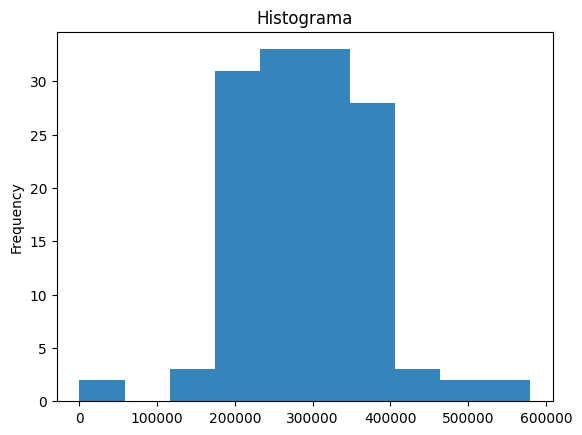

In [10]:
import matplotlib.pyplot as plt
arroyo = ds[ds["level5"] == "Arroyomolinos (Madrid)"]
arroyo["price"].plot( kind = "hist" , alpha = 0.9)
plt.title("Histograma")
plt.show()

**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

Se puede concluir que los precios dentro de estas poblaciones obscilan y se mantienen en tendencia desde los 200000 hasta los 400000.

#### Ejercicio 09. ¿Son los precios promedios de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios y escribe una conclusión sobre ellos.

In [11]:
promedio_price_val = int(ds.loc[ds["level5"]== "Valdemorillo", "price"].mean())
print(promedio_price_val)
promedio_price_gal = int(ds.loc[ds["level5" ]== "Galapagar", "price"].mean())
print(promedio_price_gal)

if promedio_price_val == promedio_price_gal:
    conclution = "Los promedios son iguales",
else: 
    conclution = "Los promedios no son iguales"
    print(conclution)

363860
360063
Los promedios no son iguales


#### Ejercicio 10. ¿Son los promedios de precio por metro cuadrado (precio/m2) de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios de precio por metro cuadrado y escribe una conclusión sobre ellos.

Pista: Crea una nueva columna llamada `pps` (*price per square* o precio por metro cuadrado) y luego analiza los valores.

In [12]:
ds["pps"]= ds["price"] / ds["surface"]
promedio_price_val2 = int(ds.loc[ds["level5"] == "Valdemorillo" , "pps"].mean())
promedio_price_gal2= int(ds.loc[ds["level5"] == "Galapagar", "pps"].mean())
print(promedio_price_val2 , promedio_price_gal2)

if promedio_price_val2 == promedio_price_gal2:
   conclution = "los promedios son iguales"
else: 
   conclution = "Los promedios no son iguales"
print(conclution)

1317 1606
Los promedios no son iguales


#### Ejercicio 11. Analiza la relación entre la superficie y el precio de las casas. (★★☆)

Pista: Puedes hacer un `scatter plot` y luego escribir una conclusión al respecto.

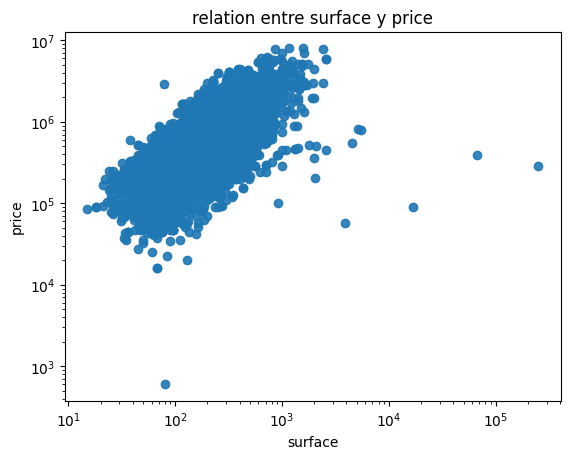

In [14]:
import pandas as pd
import matplotlib.pyplot as plt 
plt.scatter(ds["surface"], ds["price"], alpha= 0.9)
plt.xlabel("surface")
plt.ylabel("price")
plt.title("relation entre surface y price")
plt.yscale("log")
plt.xscale("log")
plt.show()

**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 12. ¿Cuántas agencia de bienes raíces contiene el dataset? (★★☆)

Imprime el valor obtenido.

In [15]:
agen_num = ds["realEstate_name"].nunique()
print(agen_num)

1821


#### Ejercicio 13. ¿Cuál es la población (columna level5) que contiene la mayor cantidad de casas?(★★☆)

Imprima la población y el número de casas.

In [16]:
more_house = ds["level5"].value_counts()
print(more_house)

count_more_house = more_house.idxmax()
print(count_more_house)
print(more_house.max())

level5
 Madrid Capital         6643
Alcalá de Henares        525
Las Rozas de Madrid      383
Móstoles                 325
Getafe                   290
                        ... 
Fresno de Torote           1
Pinilla del Valle          1
Rascafría                  1
La Hiruela                 1
Montejo de la Sierra       1
Name: count, Length: 168, dtype: int64
 Madrid Capital
6643


#### Ejercicio 14. Ahora vamos a trabajar con el "cinturón sur" de Madrid. Haz un subconjunto del DataFrame original que contenga las siguientes poblaciones (columna level5): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Pista: Filtra el DataFrame original usando la columna `level5` y la función `isin`.

In [ ]:
cinturon_sur = ["Fuenlabrada","Leganés","Getafe", "Alcorcón"]
sub_cinturon_sur = ds[ds["level5"].isin(cinturon_sur)]
print(sub_cinturon_sur)


       Unnamed: 0  id_realEstates  isNew  \
1               2       153867863  False   
3               4       152776331  False   
85             86       153152077  False   
94             95       153995577  False   
109           110       153586414  False   
...           ...             ...    ...   
15275       15276       153903887  False   
15291       15292       151697757  False   
15305       15306       153902389  False   
15322       15323       153871864  False   
15325       15326       153901467  False   

                                 realEstate_name  phone_realEstate  \
1              tecnocasa fuenlabrada ferrocarril       916358736.0   
3              tecnocasa fuenlabrada ferrocarril       916358736.0   
85                       sinergical inmobiliaria               NaN   
94                               viviendas365com       911226014.0   
109              area uno asesores inmobiliarios       912664081.0   
...                                          ...   

#### Ejercicio 15. Traza un gráfico de barras de la mediana de los precios y explica lo que observas (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprima un gráfico de barras de la mediana de precios y escriba en la celda Markdown un breve análisis sobre el gráfico.

level5
Alcorcón       179500.0
Fuenlabrada    155000.0
Getafe         285305.0
Leganés        169950.0
Name: price, dtype: float64


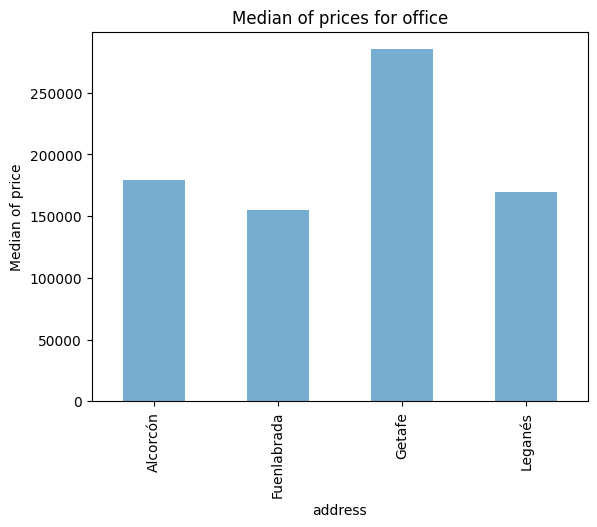

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt  
med_price = sub_cinturon_sur.groupby("level5")["price"].median()

print(med_price)

med_price.plot(kind="bar", palette =, alpha= 0.6)
plt.xlabel("address")
plt.ylabel("Median of price")
plt.title("Median of prices for office")
plt.show()

**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 16. Calcula la media y la varianza de muestra para las siguientes variables: precio, habitaciones, superficie y baños (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprime ambos valores por cada variable.

In [21]:
sub_cinturon_sur
variables = ["price", "rooms", "surface", "bathrooms"]
for var in variables:
    media = int(sub_cinturon_sur[var].mean())
    variance = int(sub_cinturon_sur[var].var())
    print(variables)
    print(media)
    print(variance)
    print()

['price', 'rooms', 'surface', 'bathrooms']
223094
14921367508

['price', 'rooms', 'surface', 'bathrooms']
3
0

['price', 'rooms', 'surface', 'bathrooms']
111
4263

['price', 'rooms', 'surface', 'bathrooms']
1
0



#### Ejercicio 17. ¿Cuál es la casa más cara de cada población? Debes usar el subset obtenido en la pregunta 14 (★★☆)

Imprime tanto la dirección como el precio de la casa seleccionada de cada población. Puedes imprimir un DataFrame o una sola línea para cada población.

In [22]:
sub_cinturon_sur
house_hight_cinturon = sub_cinturon_sur.price.max()
print(house_hight_cinturon)

house_for_poblation = sub_cinturon_sur.loc[sub_cinturon_sur.groupby("level5")["price"].idxmax()]
print(house_for_poblation[["level5", "address", "price"]])

1050000
            level5                                address    price
5585      Alcorcón                               Alcorcón   950000
11561  Fuenlabrada  Calle de Paulo Freire, 5, Fuenlabrada   490000
2881        Getafe                                 Getafe  1050000
10412      Leganés           Avenida Reina Sofía, Leganés   650000


#### Ejercicio 18. Normaliza la variable de precios para cada población y traza los 4 histogramas en el mismo gráfico (debes usar el subconjunto obtenido en la pregunta 14) (★★★)

Para el método de normalización, puedes usar el que consideres adecuado, no hay una única respuesta correcta para esta pregunta. Imprime el gráfico y escribe en la celda de Markdown un breve análisis sobre el gráfico.

Pista: Puedes ayudarte revisando la demostración multihist de Matplotlib.

StandardScaler()
        price   surface
0   -1.098364       NaN
1   -1.098364 -0.394667
2   -0.950926 -0.946386
3    0.793750  0.126402
4    1.653802  0.463564
..        ...       ...
902 -0.697006 -0.517271
903  0.457920 -0.026854
904 -0.434895 -0.409992
905 -0.909971 -0.318039
906 -0.066302 -0.195435

[907 rows x 2 columns]


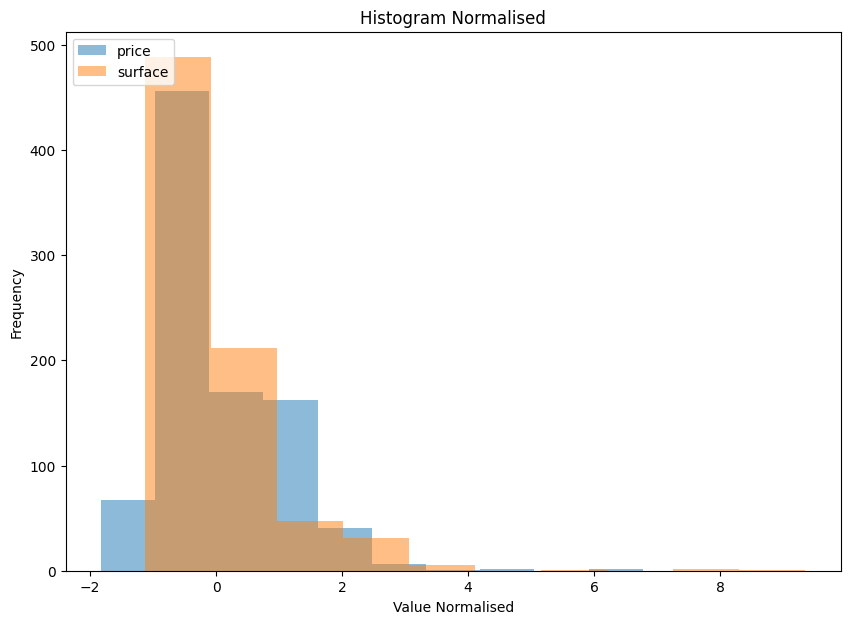

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_normal= pd.DataFrame(scaler.fit_transform(sub_cinturon_sur[["price","surface"]]), columns=["price","surface"])
print(scaler)
print(data_normal)

plt.figure(figsize=(10.0, 7.0))
for column in data_normal.columns:
    plt.hist(data_normal[column], bins=10, alpha=0.5, label=column)

plt.title("Histogram Normalised")
plt.xlabel("Value Normalised")
plt.ylabel("Frequency")
plt.legend(loc="upper left")
plt.show()

**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 19. ¿Qué puedes decir sobre el precio por metro cuadrado (precio/m2) entre los municipios de 'Getafe' y 'Alcorcón'? Debes usar el subconjunto obtenido en la pregunta 14 (★★☆)

Pista: Crea una nueva columna llamada `pps` (price per square en inglés) y luego analiza los valores

In [25]:
sub_cinturon_sur
sub_cinturon_sur["pps"]= sub_cinturon_sur["price"] / sub_cinturon_sur["surface"]
sub_cinturon_sur

promedio_price_getafe = int(sub_cinturon_sur.loc[sub_cinturon_sur ["level5"]== "Getafe" , "pps"].mean())
promedio_price_alcorcon= int(sub_cinturon_sur.loc[sub_cinturon_sur ["level5"]== "Alcorcón", "pps"].mean())
promedio_price_getafe , promedio_price_alcorcon

/tmp/ipykernel_2605/2964942941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_cinturon_sur["pps"]= sub_cinturon_sur["price"] / sub_cinturon_sur["surface"]


(2066, 2239)

#### Ejercicio 20. Realiza el mismo gráfico para 4 poblaciones diferentes (columna level5) y colócalos en el mismo gráfico. Debes usar el subconjunto obtenido en la pregunta 14 (★★☆) 
Pista: Haz un diagrama de dispersión de cada población usando subgráficos (subplots).

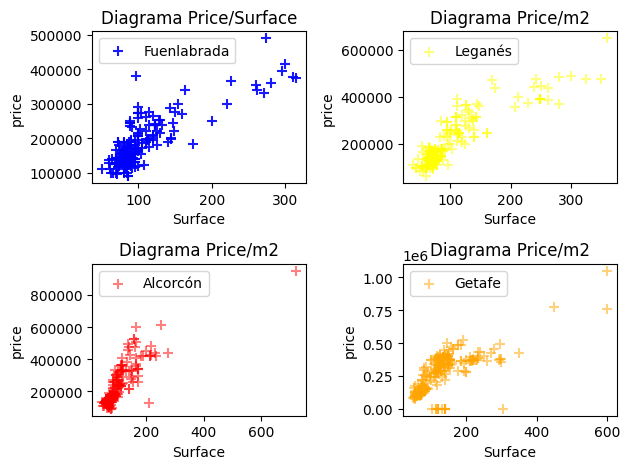

In [26]:
import matplotlib.pyplot as plt

fixs, axs= plt.subplots(2,2)
axs[0,0].scatter(sub_cinturon_sur[sub_cinturon_sur["level5"] == "Fuenlabrada"]["surface"], sub_cinturon_sur[sub_cinturon_sur["level5"]== "Fuenlabrada"]["price"], s=50, color="blue", alpha=0.9 ,label= "Fuenlabrada" , marker= "+")
axs[0,0].set_title("Diagrama Price/Surface")
axs[0,0].set_xlabel("Surface")
axs[0,0].legend(loc="upper left")
axs[0,0].set_ylabel("price")

axs[0,1].scatter(sub_cinturon_sur[sub_cinturon_sur["level5"] == "Leganés"]["surface"], sub_cinturon_sur[sub_cinturon_sur["level5"]=="Leganés"]["price"], s=50, color="yellow", alpha=0.5, label= "Leganés", marker= "+")
axs[0,1].set_title("Diagrama Price/m2")
axs[0,1].set_xlabel("Surface")
axs[0,1].legend(loc="upper left")
axs[0,1].set_ylabel("price")

axs[1,0].scatter(sub_cinturon_sur[sub_cinturon_sur["level5"] =="Alcorcón"]["surface"], sub_cinturon_sur[sub_cinturon_sur["level5"]=="Alcorcón"]["price"], s=50, color="red", alpha=0.5, label="Alcorcón", marker= "+")
axs[1,0].set_title("Diagrama Price/m2")
axs[1,0].set_xlabel("Surface")
axs[1,0].legend(loc="upper left")
axs[1,0].set_ylabel("price")

axs[1,1].scatter(sub_cinturon_sur[sub_cinturon_sur["level5"]=="Getafe"]["surface"], sub_cinturon_sur[sub_cinturon_sur["level5"]=="Getafe"]["price"], s=50, color="orange", alpha=0.5, label="Getafe", marker= "+")
axs[1,1].set_title("Diagrama Price/m2")
axs[1,1].set_xlabel("Surface")
axs[1,1].set_ylabel("price")
axs[1,1].legend(loc="upper left")
plt.tight_layout()
plt.show()

#### Ejercicio 21. Realiza un trazado de las coordenadas (columnas latitud y longitud) del cinturón sur de Madrid por color de cada población (debes usar el subconjunto obtenido del Ejercicio 14) (★★★★)

Ejecuta la siguiente celda y luego comienza a codear en la siguiente. Debes implementar un código simple que transforme las columnas de coordenadas en un diccionario de Python (agrega más información si es necesario) y agrégala al mapa.

In [27]:
from ipyleaflet import Map, basemaps

# Mapa centrado en Madrid
map = Map(center = (40.35, -3.8), zoom = 11.5, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.OpenStreetMap.Mapnik)
map

Map(center=[40.35, -3.8], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

In [50]:
## Aquí: traza la coordenadas de los estados

## PON TU CÓDIGO AQUÍ:
from ipyleaflet import Map, basemaps, Marker, Popup, AwesomeIcon
poblation_sur = sub_cinturon_sur["level5"].unique()
print(poblation_sur)

sub_cinturon_sur["latitude"]= sub_cinturon_sur["latitude"].astype(str).str.replace("," , ".").astype(float)
sub_cinturon_sur["longitude"]= sub_cinturon_sur["longitude"].astype(str).str.replace("," , ".").astype(float)
print(sub_cinturon_sur.columns)
sub_cinturon_sur= sub_cinturon_sur.loc[:, ~sub_cinturon_sur.columns.duplicated() ]

coordenadas_diccionario = sub_cinturon_sur.set_index("level5")[['latitude', 'longitude']].T.to_dict()
print(coordenadas_diccionario)
map = Map(center = (40.35, -3.8), zoom = 11.5, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.OpenStreetMap.Mapnik)
for poblacion, coords in coordenadas_diccionario.items():
    marker = Marker(location=(coords["latitude"], coords["longitude"]), draggable=False, title=poblacion)
    map.add_layer(marker)

map


['Fuenlabrada' 'Alcorcón' 'Leganés' 'Getafe']
Index(['Unnamed: 0', 'id_realEstates', 'isNew', 'realEstate_name',
       'phone_realEstate', 'url_inmueble', 'rooms', 'bathrooms', 'surface',
       'price', 'date', 'description', 'address', 'country', 'level1',
       'level2', 'level3', 'level4', 'level5', 'level6', 'level7', 'level8',
       'upperLevel', 'countryId', 'level1Id', 'level2Id', 'level3Id',
       'level4Id', 'level5Id', 'level6Id', 'level7Id', 'level8Id', 'accuracy',
       'latitude', 'longitude', 'zipCode', 'customZone', 'pps'],
      dtype='object')
{'Fuenlabrada': {'latitude': 40.28062, 'longitude': -3.79869}, 'Alcorcón': {'latitude': 40.344393, 'longitude': -3.839799}, 'Leganés': {'latitude': 40.3259051, 'longitude': -3.76318}, 'Getafe': {'latitude': 40.31667, 'longitude': -3.74072}}


/tmp/ipykernel_2605/3273012393.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_cinturon_sur["latitude"]= sub_cinturon_sur["latitude"].astype(str).str.replace("," , ".").astype(float)
/tmp/ipykernel_2605/3273012393.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_cinturon_sur["longitude"]= sub_cinturon_sur["longitude"].astype(str).str.replace("," , ".").astype(float)
/tmp/ipykernel_2605/3273012393.py:13: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  coordenadas

Map(center=[40.35, -3.8], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…